In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats.stats import ttest_ind
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

stPerformance = pd.read_sql_query('select * from studentsperformance',con=engine)
engine.dispose()

stPerformance.columns = stPerformance.columns.str.lower()


In [4]:
stPerformance.info

<bound method DataFrame.info of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
5    female        group B          associate's degree      standard   
6    female        group B                some college      standard   
7      male        group B                some college  free/reduced   
8      male        group D                 high school  free/reduced   
9    female        group B                 high school  free/reduced   
10     male        group C          associate's degree      standard   
11     male        group D          associate's degree      standard   
12   female        group B      

# 1) Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

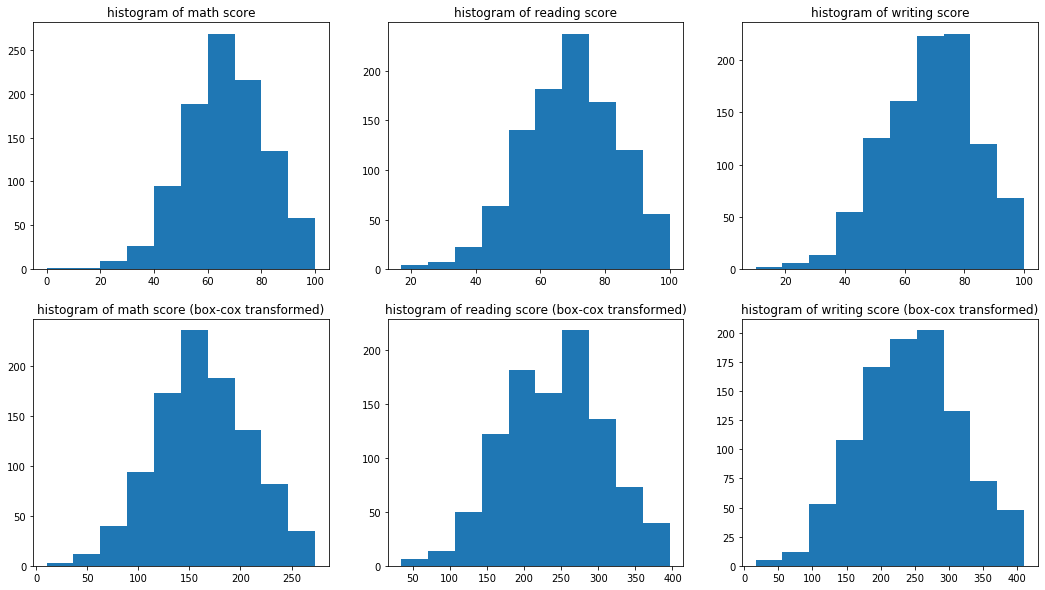

In [10]:
from scipy.stats import boxcox

math_boxcox,_ = boxcox(stPerformance[stPerformance["math score"] > 0]["math score"])
reading_boxcox,_ = boxcox(stPerformance["reading score"])
writing_boxcox,_ = boxcox(stPerformance["writing score"])
plt.figure(figsize=(18,10))

plt.subplot(2, 3, 1)
plt.hist(stPerformance["math score"])
plt.title("histogram of math score")

plt.subplot(2, 3, 2)
plt.hist(stPerformance["reading score"])
plt.title("histogram of reading score")

plt.subplot(2, 3, 3)
plt.hist(stPerformance["writing score"])
plt.title("histogram of writing score")




plt.subplot(2, 3, 4)
plt.hist(math_boxcox)
plt.title("histogram of math score (box-cox transformed)")

plt.subplot(2, 3, 5)
plt.hist(reading_boxcox)
plt.title("histogram of reading score (box-cox transformed)")

plt.subplot(2, 3, 6)
plt.hist(writing_boxcox)
plt.title("histogram of writing score (box-cox transformed)")

plt.show()


In [11]:

from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(stPerformance["math score"])
norm_stats = normaltest(stPerformance["math score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(stPerformance["reading score"])
norm_stats = normaltest(stPerformance["reading score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(stPerformance["writing score"])
norm_stats = normaltest(stPerformance["writing score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 15.912256686712709 and p value is 0.0003505075386818213
Normality test statistics is 15.408960513931822 and p value is 0.00045080293869937836
Jarque-Bera test statistics is 11.383300575987892 and p value is 0.0033740202672214448
Normality test statistics is 11.11741279628622 and p value is 0.003853758403576582
Jarque-Bera test statistics is 13.98509448257235 and p value is 0.0009187033894586527
Normality test statistics is 13.606450837263859 and p value is 0.0011101885439899974



prior to the box-cox our test scores were not normally distributed.
After applying Box-Cox transformation, the distributions seem very close to a normal distribution. 

# 2)  Say, we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed or not. If it's not normally distributed, apply Box-Cox transformation and check whether the transformed variable is normally distributed

In [12]:
newVariable = (stPerformance["math score"] +
              stPerformance["reading score"] + stPerformance["writing score"])/3

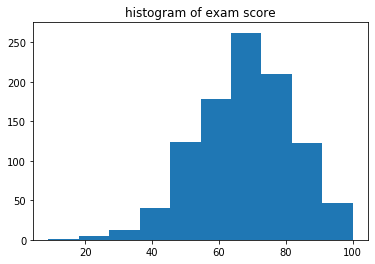

Jarque-Bera test statistics is 15.453387913085168 and p value is 0.00044089934264401887
Normality test statistics is 15.186721327231322 and p value is 0.0005037851534494478


In [13]:
plt.hist(newVariable)
plt.title("histogram of exam score")
plt.show()

jb_stats = jarque_bera(newVariable)
norm_stats = normaltest(newVariable)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

The graph above is skeweed left, this is not normal

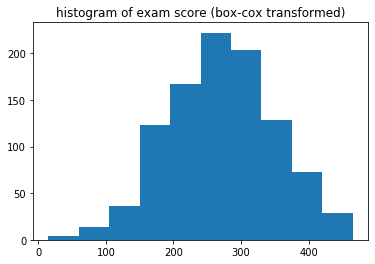

Jarque-Bera test statistics is 2.4353989331279 and p value is 0.2959101356398447
Normality test statistics is 2.779857602227616 and p value is 0.24909303914726724


In [14]:
newVariable,_ = boxcox(newVariable)

plt.hist(newVariable)
plt.title("histogram of exam score (box-cox transformed)")
plt.show()

jb_stats = jarque_bera(newVariable)
norm_stats = normaltest(newVariable)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

After applying the box-cox and testing with Jarque-Bera tests statistics. The gaph looks very much normal.

# 3) Which variables do seem to be related with the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of the success in the exams, which variables in our dataset might be useful?

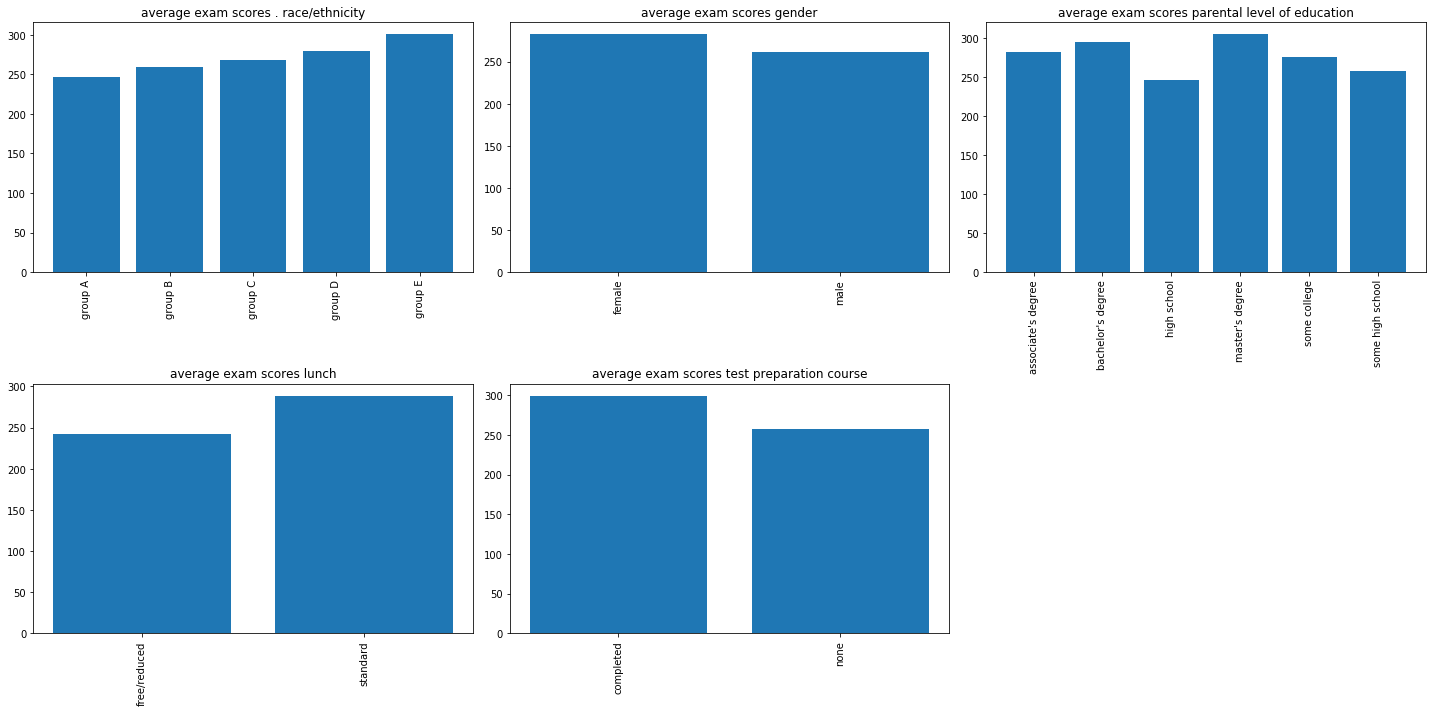

In [20]:
stPerformance["exam_score"] = newVariable

plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.bar(stPerformance.groupby("race/ethnicity")
        ["exam_score"].mean().index, stPerformance.groupby("race/ethnicity")["exam_score"].mean())

plt.title("average exam scores . race/ethnicity")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 2)
plt.bar(stPerformance.groupby("gender")
        ["exam_score"].mean().index, stPerformance.groupby("gender")["exam_score"].mean())

plt.title("average exam scores gender")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 3)
plt.bar(stPerformance.groupby("parental level of education")
        ["exam_score"].mean().index, stPerformance.groupby("parental level of education")["exam_score"].mean())

plt.title("average exam scores parental level of education")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 4)
plt.bar(stPerformance.groupby("lunch")
        ["exam_score"].mean().index, stPerformance.groupby("lunch")["exam_score"].mean())

plt.title("average exam scores lunch")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 5)
plt.bar(stPerformance.groupby("test preparation course")
        ["exam_score"].mean().index, stPerformance.groupby("test preparation course")["exam_score"].mean())

plt.title("average exam scores test preparation course")
plt.xticks(rotation="vertical")

plt.tight_layout()
plt.show()

Average exam scores increase gradually from group A to E, with E being the highest. Ethnicity and race could have an impact on the scores concerning group A - E. Females on average scored higher than males on the exams. 

Average exam scores with parental level of education states that that those with some type of degree has a higher score than those without. Masters and Bachalors's having the highest scores.

Students with standard lunch has a higher exam score than those with free/reduced lunch 

Those who completed the test preparation course seem to be more successful than the others.

If the goal is to determine the variable that has the most effects is the lunch variable because it shows the most signinficant gap between exam scores.